##The code is implemented and run on Google Colab

In [ ]:
# If use Google Colab, use the two commands to install torch and torchvision
!pip install torch
!pip install torchvision

In [ ]:
import torchvision
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor, Compose
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# load data
train_dataset = datasets.CIFAR10(root='data/', download=True, train=True, transform=ToTensor())
test_dataset = datasets.CIFAR10(root='data/', download=True, train=False, transform=ToTensor())

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting data/cifar-10-python.tar.gz to data/
Files already downloaded and verified


In [ ]:
# load train and test data
X_train = train_dataset.data/255
y_train = np.array(train_dataset.targets)
X_test = test_dataset.data/255
y_test = np.array(test_dataset.targets)

In [ ]:
# vectorize train and test data
X_train = X_train.reshape((50000, 32*32*3))
X_test = X_test.reshape((10000, 32*32*3))

In [ ]:
def linear_classifier(input_x, weight, bias):
  scores = np.dot(weight.T,input_x) + bias
  return scores 

def loss(output,y):
  #use formula -summation(y*log(y_hat))/n
  #add small number to avoid log divide zero
  L = np.negative(np.sum(y*np.log(output+10**-10)))/len(y)
  return L

def softmax_function(score):
  #normalize exp
  exp_score = np.exp(score-np.max(score))
  return exp_score/np.sum(exp_score)

# one hot encode to match shape of y_hat
def one_hot_encode(y):
  encoded_y = np.zeros((len(y),10))
  for i in range(len(y)):
    encoded_y[i,y[i]]=1
  return encoded_y

#calculate l2 regularization
#set lambda as 0.5
def regularization(w):
  return (0.25 * np.sum(np.linalg.norm(w)))/50000
  
def gradient_descent(w,b,learning_rate,x,y):
  list_total_loss=[]
  list_acc = []
  list_learning_rate = []

  for epoch in range (1000):
    epoch+=1
    #decreaseing learning rate schedule
    if epoch %10 ==0:
      list_learning_rate.append(learning_rate)
      prediction = []
      #get accuracy for this learning rate
      for i in y_hat:
        prediction.append(np.argmax(i))
      prediction = np.array(prediction)
      acc = calculate_accuracy(prediction,y)
      list_acc.append(acc)
      #new learning rate
      learning_rate = 1/epoch

    y_hat = []
    #calculate softmax and loss for each image in dataset
    for i in range(len(x)):
      score = linear_classifier(x[i], w, b)
      softmax_score = softmax_function(score)
      y_hat.append(softmax_score)

    y_hat = np.array(y_hat)
    encoded_y=one_hot_encode(y)
    #calculate derivative of loss with respect to w
    dw = (1/(x.shape[0]))*np.dot(np.negative(x.T),(encoded_y-y_hat))+ 0.5*w
    #calculate db
    db = (1/(x.shape[0]))*np.sum((encoded_y-y_hat))
    #update dw, db
    w = w - learning_rate*dw
    b = b - learning_rate*db
    Total_loss = loss(y_hat,encoded_y)+regularization(w)
    list_total_loss.append(Total_loss)
  return w, b, list_total_loss, list_acc, list_learning_rate

# give predicted labels and true labels, find all differences
# calculate accruacy: #corrects/#total
def calculate_accuracy (predict_labels, true_labels):
    corrects = np.nonzero(predict_labels == true_labels)[0]
    accuracy = len(corrects)/len(true_labels)
    return accuracy

## random weights and bias

In [ ]:
random_weights=np.random.uniform(low=0,high=1,size=(3072,10))
random_bias= np.random.uniform(low=0,high=1,size=(10,))

## get weights, bias and loss

In [ ]:
# the initial learning rate is 0.1
# but learning rate will decrease over time, until 0.0001
# every 10 epochs the learning rate will change to 1/n 
lr = 0.1
w, b, loss, accuracies, learning_rates = gradient_descent(random_weights,random_bias,lr, X_train,y_train)

## Plot loss graph

Final loss at 1000 epochs is:  1.977920918587088


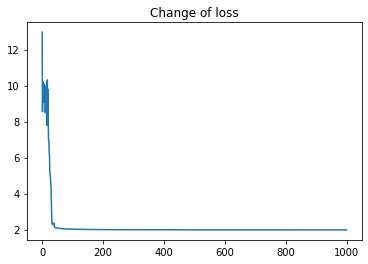

In [ ]:
plt.plot([i for i in range (len(loss))], loss)
plt.title('Change of loss')
print("Final loss at 1000 epochs is: ", loss[len(loss)-1])

## Plot change of accuracy

Text(0.5, 1.0, 'Change of accuracies')

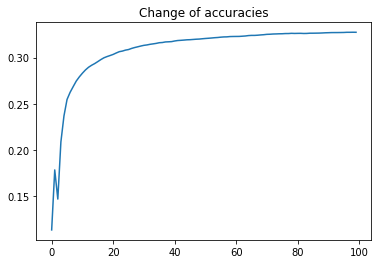

In [ ]:
plt.plot([i for i in range(len(accuracies))], accuracies)
plt.title('Change of accuracies')

## Plot change of learning rate

Text(0.5, 1.0, 'Change of learning rates')

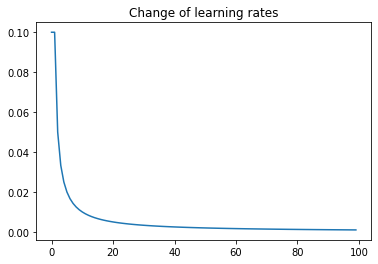

In [ ]:
plt.plot([i for i in range(len(learning_rates))], learning_rates)
plt.title('Change of learning rates')

## Calculate final accuracy

In [ ]:
y_hat = []
for x in X_test:
  score = linear_classifier(x, w, b)
  softmax_score = softmax_function(score)
  y_hat.append(softmax_score)

y_hat = np.array(y_hat)
prediction = []
for i in y_hat:
  prediction.append(np.argmax(i))
prediction = np.array(prediction)
acc = calculate_accuracy(prediction,y_test)
print("The final accruacy for softmax:",acc*100,"%")

The final accruacy for softmax: 32.54 %
